In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os

original_dir = os.getcwd()
os.chdir('..')

from decision_plotting import DecisionRegionPlotter
os.chdir(original_dir)

In [2]:
drp = DecisionRegionPlotter()

In [3]:
iris_data_loc = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_data_loc, index_col=None, header=None, encoding='utf-8')
from sklearn import model_selection


class_labels = df[4].unique()
label_to_int = lambda x: np.where(class_labels == x)[0][0]
df['int_labels'] = df[4].apply(label_to_int)
print(df.info())

X = df.iloc[:, 0:3]
y = df['int_labels']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
print(X_test.shape, X_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           150 non-null    float64
 1   1           150 non-null    float64
 2   2           150 non-null    float64
 3   3           150 non-null    float64
 4   4           150 non-null    object 
 5   int_labels  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(45, 3) (105, 3)


In [4]:
crit = 'gini'
depth_max = 4
tree_mod = DecisionTreeClassifier(criterion=crit, max_depth=depth_max, random_state=42).fit(X_train, y_train)

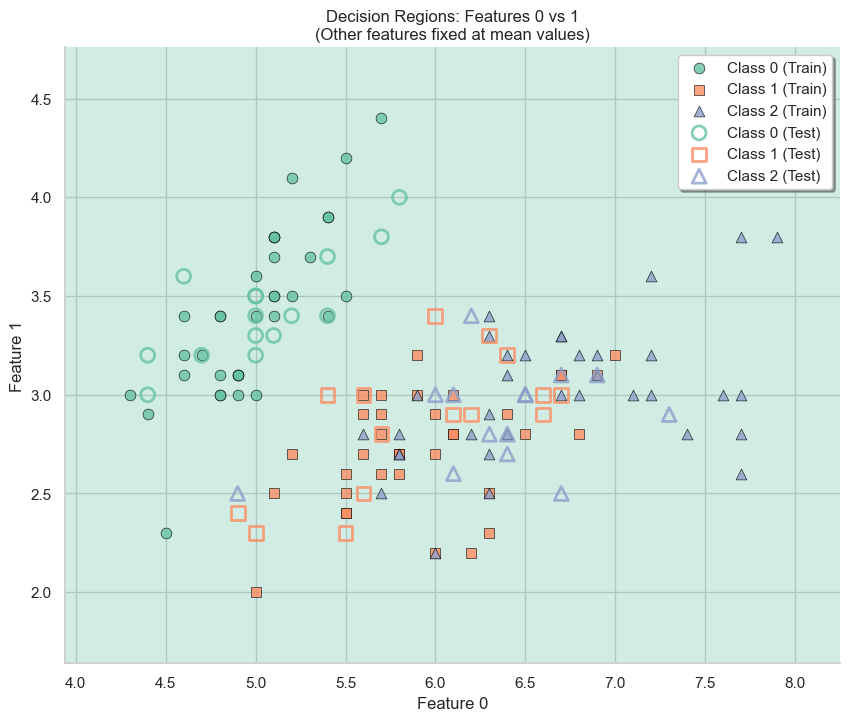

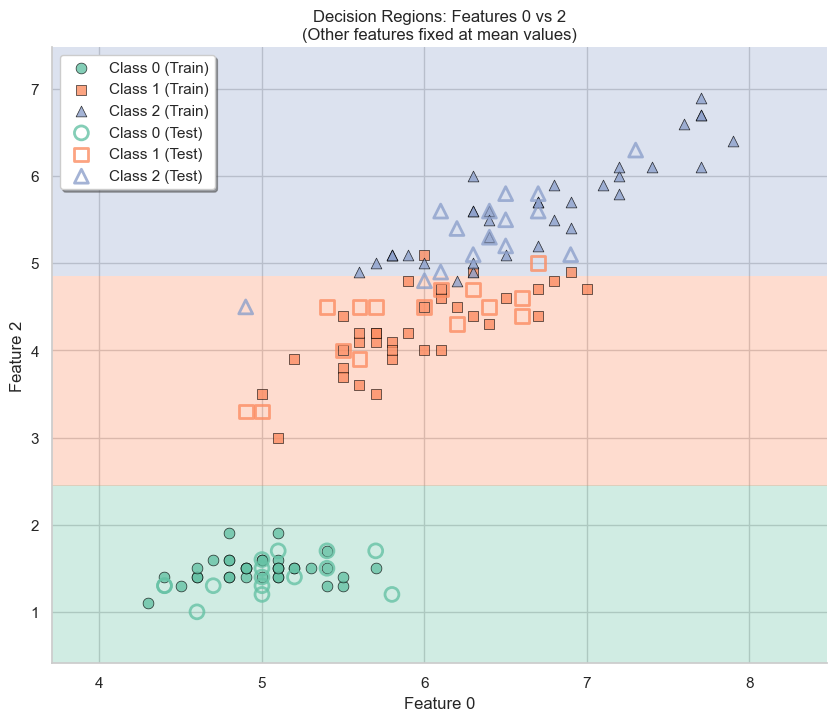

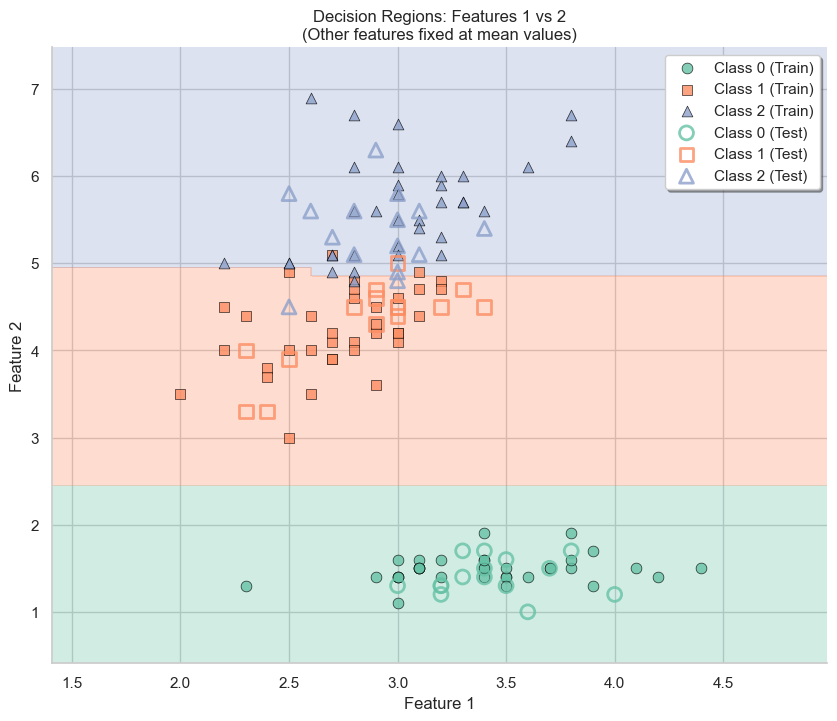

The decision tree accuracy with the gini criterion and a max depth of 4 is 93.33%.


In [5]:
drp.plot_decision_regions(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=tree_mod, resolution=0.01, feature_indices=(0, 1))
plt.show()
drp.plot_decision_regions(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=tree_mod, resolution=0.01, feature_indices=(0, 2))
plt.show()
drp.plot_decision_regions(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=tree_mod, resolution=0.01, feature_indices=(1, 2))
plt.show()

acc_tree_mod = np.sum(tree_mod.predict(X_test) == y_test)/len(y_test)
print(f"The decision tree accuracy with the {crit} criterion and a max depth of {depth_max} is {acc_tree_mod*100:.2f}%.")

[Text(0.34615384615384615, 0.9, 'Petal Length <= 2.45\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2692307692307692, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.3076923076923077, 0.8, 'True  '),
 Text(0.4230769230769231, 0.7, 'Petal Length <= 4.85\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3846153846153846, 0.8, '  False'),
 Text(0.15384615384615385, 0.5, 'Petal Length <= 4.75\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.23076923076923078, 0.3, 'Sepal Length <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.6923076923076923, 0.5, 'Petal Length <= 4.95\ngini = 0.149\nsamples = 37\nvalue = [0, 3, 34]'),
 Text(0.5384615384615384, 0.3, 'Sepal Width <= 2.6\ngini = 0.5\nsamples = 

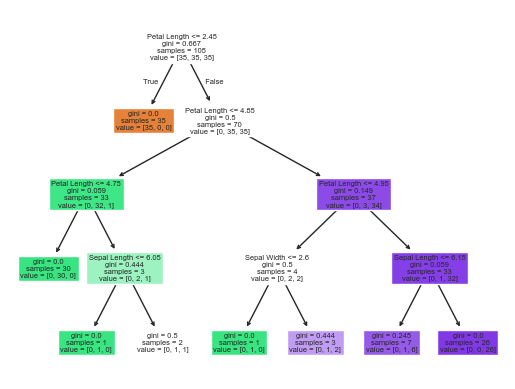

In [7]:
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
tree.plot_tree(tree_mod, feature_names=feature_names, filled=True)